In [1]:
from FireSimulator import *
from FireSimulatorUtilities import *

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [78]:
grid_size = 5
dp = 0
alpha = 0.2763
beta = np.exp(-0.1)

p_meas_wrong = 0.1
p_meas_right = 0.8

w = 1

In [79]:
choice = {}

for xi_prev in [0,1,2]:
    choice[xi_prev] = {}
    if xi_prev == 0:
        print('xi_prev, non_fi, fi, meas, xi_curr, score')
        for num_neighbors in [2,3,4]:
            choice[xi_prev][num_neighbors] = {}
            for non_fi in range(num_neighbors+1):
                choice[xi_prev][num_neighbors][non_fi] = {}
                fi = num_neighbors - non_fi
                choice[xi_prev][num_neighbors][non_fi][fi] = {}
                #for fi in range(5-non_fi):
                    #non_fi = num_neighbors - fi
                for meas in [0,1,2]:
                    choice[xi_prev][num_neighbors][non_fi][fi][meas] = -1
                    best_score = np.inf
                    for xi_curr in [0,1,2]:
                        score = 0
                        if meas==xi_curr:
                            score += -w*np.log(p_meas_right)
                        else:
                            score += -w*np.log(p_meas_wrong)

                        if xi_curr == 0:
                            score += -np.log(alpha**(p_meas_right*fi + p_meas_wrong*non_fi))
                            #score += -np.log(alpha**fi)
                        elif xi_curr == 1:
                            score += -np.log(1 - alpha**(p_meas_right*fi + p_meas_wrong*non_fi))   
                            #score += -np.log(1-alpha**fi)
                        elif xi_curr == 2:
                            score += np.inf

                        if score < best_score:
                            best_score = score
                            choice[xi_prev][num_neighbors][non_fi][fi][meas] = xi_curr

                        print(xi_prev,non_fi,fi,meas,xi_curr,score)
        print()
        
    if xi_prev == 1:
        print('xi_prev, meas, xi_curr, score')
        for meas in [0,1,2]:
            choice[xi_prev][meas] = -1
            best_score = np.inf
            for xi_curr in [0,1,2]:
                score = 0
                if meas==xi_curr:
                    score += -w*np.log(p_meas_right)
                else:
                    score += -w*np.log(p_meas_wrong)
                    
                if xi_curr==0:
                    score += np.inf
                elif xi_curr==1:
                    score += -np.log(beta)
                elif xi_curr==2:
                    score += -np.log(1-beta)
                    
                if score < best_score:
                    best_score = score
                    choice[xi_prev][meas] = xi_curr
                    
                print(xi_prev,meas,xi_curr,score)
        print()
        
    if xi_prev == 2:
        print('xi_prev, meas, xi_curr, score')
        for meas in [0,1,2]:
            choice[xi_prev][meas] = -1
            best_score = np.inf
            for xi_curr in [0,1,2]:
                score = 0
                if meas==xi_curr:
                    score += -w*np.log(p_meas_right)
                else:
                    score += -w*np.log(p_meas_wrong)
                    
                if xi_curr==0:
                    score += np.inf
                elif xi_curr==1:
                    score += np.inf
                elif xi_curr==2:
                    score += -np.log(1)
                    
                if score < best_score:
                    best_score = score
                    choice[xi_prev][meas] = xi_curr
                    
                print(xi_prev,meas,xi_curr,score)
                    
                    

xi_prev, non_fi, fi, meas, xi_curr, score
0 0 2 0 0 2.2811724266
0 0 2 0 1 2.43921321305
0 0 2 0 2 inf
0 0 2 1 0 4.36061396828
0 0 2 1 1 0.359771671372
0 0 2 1 2 inf
0 0 2 2 0 4.36061396828
0 0 2 2 1 2.43921321305
0 0 2 2 2 inf
0 1 1 0 0 1.38078479366
0 1 1 0 1 2.67979296141
0 1 1 0 2 inf
0 1 1 1 0 3.46022633534
0 1 1 1 1 0.600351419731
0 1 1 1 2 inf
0 1 1 2 0 3.46022633534
0 1 1 2 1 2.67979296141
0 1 1 2 2 inf
0 2 0 0 0 0.480397160725
0 2 0 0 1 3.78614881464
0 2 0 0 2 inf
0 2 0 1 0 2.5598387024
0 2 0 1 1 1.70670727296
0 2 0 1 2 inf
0 2 0 2 0 2.5598387024
0 2 0 2 1 3.78614881464
0 2 0 2 2 inf
0 0 3 0 0 3.31018686424
0 0 3 0 1 2.34929594339
0 0 3 0 2 inf
0 0 3 1 0 5.38962840592
0 0 3 1 1 0.269854401712
0 0 3 1 2 inf
0 0 3 2 0 5.38962840592
0 0 3 2 1 2.34929594339
0 0 3 2 2 inf
0 1 2 0 0 2.4097992313
0 1 2 0 1 2.42169712956
0 1 2 0 2 inf
0 1 2 1 0 4.48924077298
0 1 2 1 1 0.342255587879
0 1 2 1 2 inf
0 1 2 2 0 4.48924077298
0 1 2 2 1 2.42169712956
0 1 2 2 2 inf
0 2 1 0 0 1.50941159837
0 2

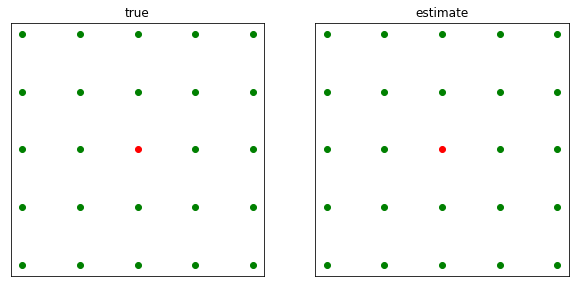

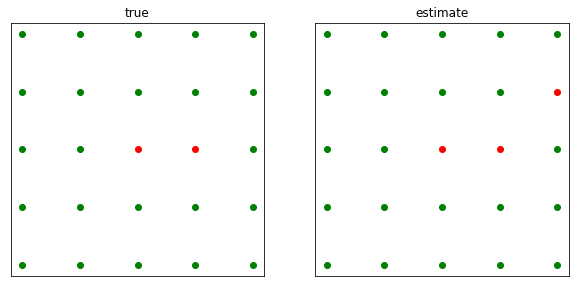

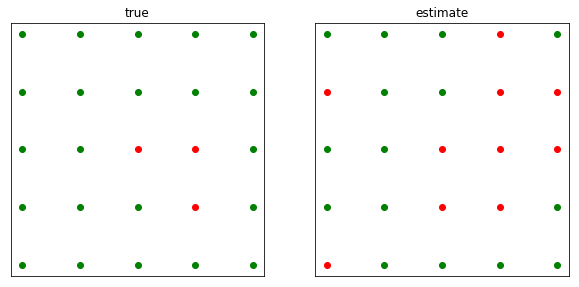

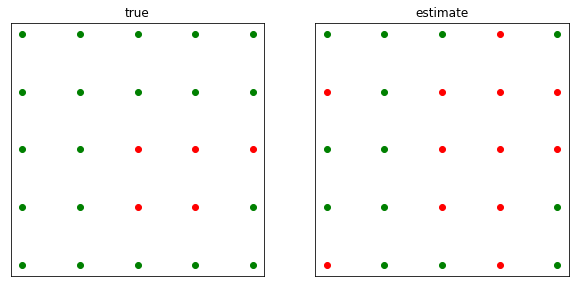

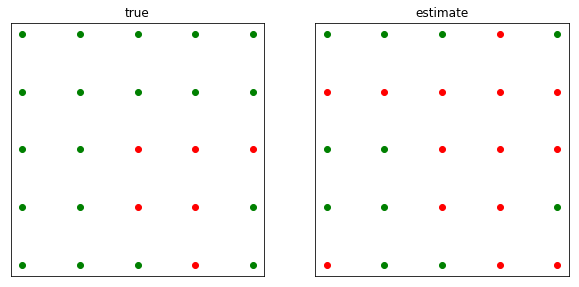

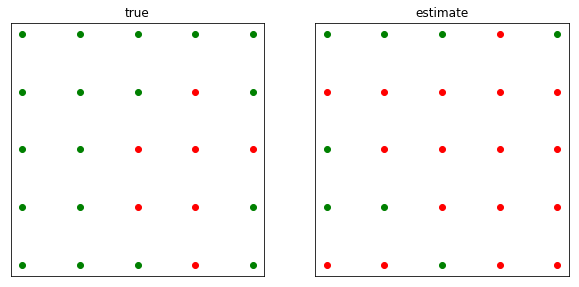

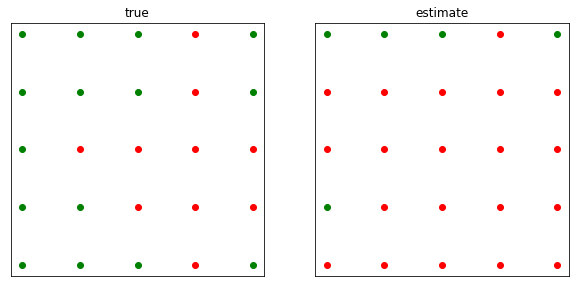

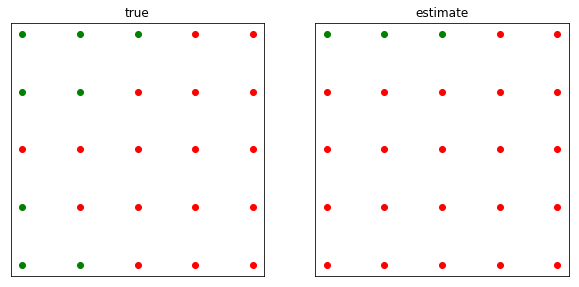

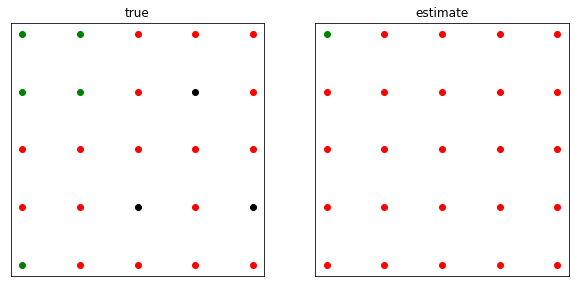

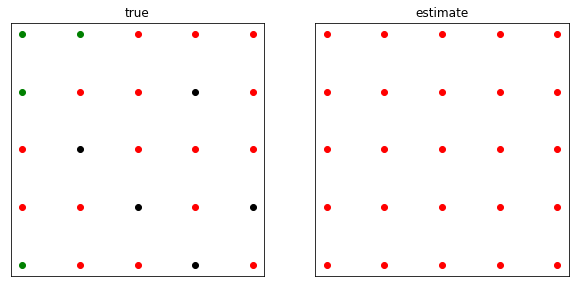

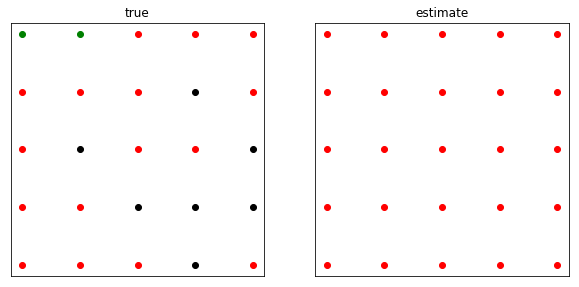

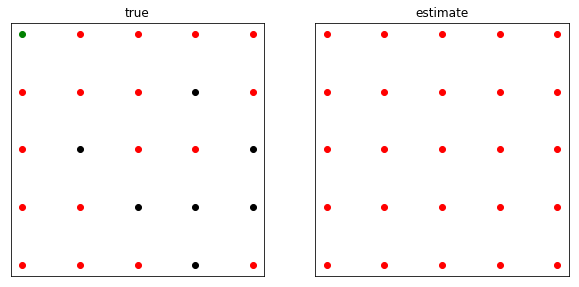

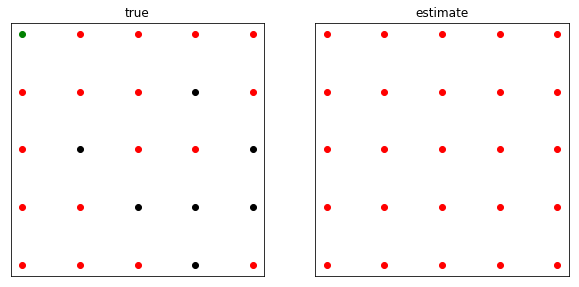

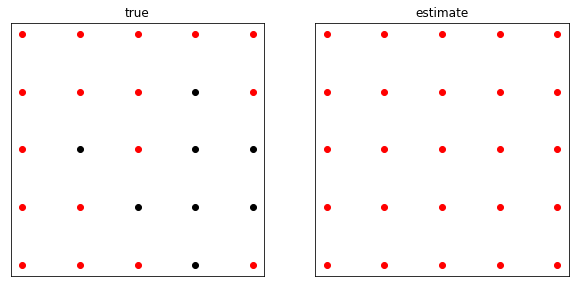

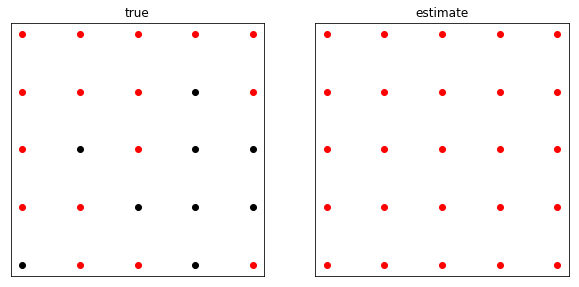

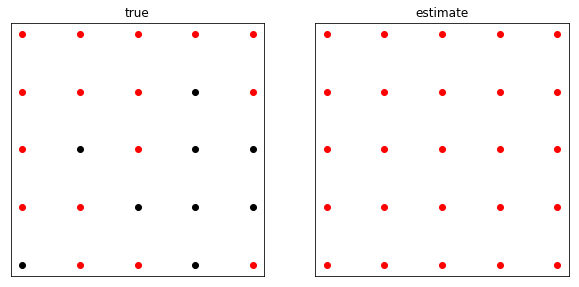

In [80]:
np.random.seed(10)

sim = FireSimulator(grid_size)
plt.close()

sim.step([], dbeta=dp)
state_est = np.copy(sim.state)

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(121, aspect='equal')
plt.title('true')
plt.tick_params(axis='both', which='both', labelbottom=False, labelleft=False, bottom=False, left=False)

ax2 = fig.add_subplot(122, aspect='equal')
plt.tick_params(axis='both', which='both', labelbottom=False, labelleft=False, bottom=False, left=False)
plt.title('estimate')

for i in range(grid_size):
    for j in range(grid_size):
        x = col_to_x(j)
        y = row_to_y(grid_size,i)

        if sim.state[i,j] == 0:
            ax1.plot(x,y,'go')
        elif sim.state[i,j] == 1:
            ax1.plot(x,y,'ro')
        else:
            ax1.plot(x,y,'ko')
            
        if state_est[i,j] == 0:
            ax2.plot(x,y,'go')
        elif state_est[i,j] == 1:
            ax2.plot(x,y,'ro')
        else:
            ax2.plot(x,y,'ko')

for _ in range(15):
    action = []
    
    sim.step(action, dbeta=dp)
    
    state_est_next = np.zeros_like(sim.state)
    for i in range(grid_size):
        for j in range(grid_size):
            
            meas = sim.state[i,j]
            p_list = [0.1,0.1,0.1]
            p_list[meas] += 0.7
            meas = np.random.choice([0,1,2], p=p_list)
            
            if state_est[i,j] == 0:
                nn = [(-1,0),(1,0),(0,-1),(0,1)]
                non_fi = 0
                fi = 0
                for (di,dj) in nn:
                    ii = i + di
                    jj = j + dj
                    if ii >= 0 and ii < grid_size and jj >= 0 and jj < grid_size:
                        if state_est[ii,jj] == 1:
                            fi += 1
                        else:
                            non_fi += 1
                            
                num_neighbors = non_fi + fi
                        
                state_est_next[i,j] = choice[0][num_neighbors][non_fi][fi][meas]
                
            elif state_est[i,j] == 1:
                state_est_next[i,j] = choice[1][meas]
                
            elif state_est[i,j] == 2:
                state_est_next[i,j] = choice[2][meas]
                
    state_est = state_est_next
    
    fig = plt.figure(figsize=(10,10))

    ax1 = fig.add_subplot(121, aspect='equal')
    plt.title('true')
    plt.tick_params(axis='both', which='both', labelbottom=False, labelleft=False, bottom=False, left=False)

    ax2 = fig.add_subplot(122, aspect='equal')
    plt.tick_params(axis='both', which='both', labelbottom=False, labelleft=False, bottom=False, left=False)
    plt.title('estimate')

    for i in range(grid_size):
        for j in range(grid_size):
            x = col_to_x(j)
            y = row_to_y(grid_size,i)

            if sim.state[i,j] == 0:
                ax1.plot(x,y,'go')
            elif sim.state[i,j] == 1:
                ax1.plot(x,y,'ro')
            else:
                ax1.plot(x,y,'ko')

            if state_est[i,j] == 0:
                ax2.plot(x,y,'go')
            elif state_est[i,j] == 1:
                ax2.plot(x,y,'ro')
            else:
                ax2.plot(x,y,'ko')
